In [1]:
#importing all dependencies needed
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
#using the create_engine function to connect to our local DataBase. 
rds_connection_string = "root:kaba.611@localhost/marketing_db"
engine = create_engine(f'mysql+pymysql://{rds_connection_string}')

In [3]:
engine.table_names()

['channels', 'marketing_subset', 'summary_table']

In [4]:
csv_file = "~/Documents/Data_Analytic_Boot_Camp/Project4/Marketing_Subset.csv"
summary_df = pd.read_csv(csv_file)
summary_df.to_sql(name='summary_table', con=engine, if_exists='append', index=False)
pd.read_sql_query('select * from summary_table', con=engine).head()

,day,advertiser_id,channel_id,impressions,verified_visits,verified_visit_conversions,verified_visit_total_order_value,total_spend
0,2017-07-09,12274,6,8870,17,0,0.00,53.2200
1,2017-07-09,12283,1,6648,16,0,0.00,36.6598
2,2017-07-09,12283,6,10015,20,0,0.00,52.7699
3,2017-07-09,12289,1,52430,68,21,1231.64,183.2288
4,2017-07-09,12289,6,8814,20,0,0.00,20.9973


In [4]:
csv_file = "~/Documents/Data_Analytic_Boot_Camp/Project4/Channels.csv"
summary_df = pd.read_csv(csv_file)
summary_df.to_sql(name='channels', con=engine, if_exists='append', index=False)
pd.read_sql_query('select * from channels', con=engine).head()

,channel_id,name
0,10,Twitter Retargeting
1,14,Connected TV
2,15,Ad Serving
3,13,In-App Retargeting
4,5,Facebook Retargeting


In [6]:
pd.read_sql_query('select distinct channel_id, name from channels', con=engine)

,channel_id,name
0,10,Twitter Retargeting
1,14,Connected TV
2,15,Ad Serving
3,13,In-App Retargeting
4,5,Facebook Retargeting
5,9,Instagram Retargeting
6,1,Desktop Retargeting
7,6,Mobile Web Retargeting
8,2,Real Time Offers
9,3,Desktop Prospecting


In [ ]:
final = pd.read_sql_query('select * from summary_table join channels using (channel_id);', con=engine)

In [ ]:
final.to_csv('~/Documents/Data_Analytic_Boot_Camp/Project4/Marketing_Master.csv')

In [2]:
final = pd.read_csv('Marketing_Master.csv')
final.head()

,Unnamed: 0,channel_id,day,advertiser_id,impressions,verified_visits,verified_visit_conversions,verified_visit_total_order_value,total_spend,name
0,0,6,2017-07-09,12274,8870,17,0,0.0,53.22,Mobile Web Retargeting
1,1,6,2017-07-09,12274,8870,17,0,0.0,53.22,Mobile Web Retargeting
2,2,6,2017-07-09,12274,8870,17,0,0.0,53.22,Mobile Web Retargeting
3,3,6,2017-07-09,12274,8870,17,0,0.0,53.22,Mobile Web Retargeting
4,4,6,2017-07-09,12274,8870,17,0,0.0,53.22,Mobile Web Retargeting


In [22]:
summary = pd.read_csv('Marketing_Subset.csv')
summary.head()

,day,advertiser_id,channel_id,impressions,verified_visits,verified_visit_conversions,verified_visit_total_order_value,total_spend
0,2017-07-09,12274,6,8870,17,0,0.00,53.2200
1,2017-07-09,12283,1,6648,16,0,0.00,36.6598
2,2017-07-09,12283,6,10015,20,0,0.00,52.7699
3,2017-07-09,12289,1,52430,68,21,1231.64,183.2288
4,2017-07-09,12289,6,8814,20,0,0.00,20.9973


In [23]:
result = (summary['verified_visit_total_order_value']>0.0)*1
summary['purchase_flag'] = result
summary.head()

,day,advertiser_id,channel_id,impressions,verified_visits,verified_visit_conversions,verified_visit_total_order_value,total_spend,purchase_flag
0,2017-07-09,12274,6,8870,17,0,0.00,53.2200,0
1,2017-07-09,12283,1,6648,16,0,0.00,36.6598,0
2,2017-07-09,12283,6,10015,20,0,0.00,52.7699,0
3,2017-07-09,12289,1,52430,68,21,1231.64,183.2288,1
4,2017-07-09,12289,6,8814,20,0,0.00,20.9973,0


In [24]:
result30 = (summary['verified_visit_conversions']>0.0)*1
summary['purchase_conversions_flag'] = result30
summary.head()

,day,advertiser_id,channel_id,impressions,verified_visits,verified_visit_conversions,verified_visit_total_order_value,total_spend,purchase_flag,purchase_conversions_flag
0,2017-07-09,12274,6,8870,17,0,0.00,53.2200,0,0
1,2017-07-09,12283,1,6648,16,0,0.00,36.6598,0,0
2,2017-07-09,12283,6,10015,20,0,0.00,52.7699,0,0
3,2017-07-09,12289,1,52430,68,21,1231.64,183.2288,1,1
4,2017-07-09,12289,6,8814,20,0,0.00,20.9973,0,0


In [25]:
#create the bins on based in which data will be held
bins = [0,25,50,75,100,150,200,250,300,1000,5000,10000,30000,60000,70000]
#create the names for the bins
group_names = ['X<25','X<50','X<75','X<100','X<150','X<200','X<250','X<300','X<1K','X<5K','X<10K','X<30K','X<60K','X<70K']

In [26]:
summary['spending_group'] = pd.cut(summary['total_spend'],bins,labels=group_names)

In [27]:
#creating categorical data for weekdays and channel_id
binary = pd.get_dummies(summary, columns=['spending_group'])
binary.head(1)

,day,advertiser_id,channel_id,impressions,verified_visits,verified_visit_conversions,verified_visit_total_order_value,total_spend,purchase_flag,purchase_conversions_flag,...,spending_group_X<150,spending_group_X<200,spending_group_X<250,spending_group_X<300,spending_group_X<1K,spending_group_X<5K,spending_group_X<10K,spending_group_X<30K,spending_group_X<60K,spending_group_X<70K
0,2017-07-09,12274,6,8870,17,0,0.0,53.22,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
data = binary.drop(columns =['day','channel_id','advertiser_id','verified_visits',
                             'verified_visit_conversions','verified_visit_total_order_value',
                            'purchase_flag','purchase_conversions_flag','total_spend'])
feature_names = data.columns
data.count()

impressions             550385
spending_group_X<25     550385
spending_group_X<50     550385
spending_group_X<75     550385
spending_group_X<100    550385
spending_group_X<150    550385
spending_group_X<200    550385
spending_group_X<250    550385
spending_group_X<300    550385
spending_group_X<1K     550385
spending_group_X<5K     550385
spending_group_X<10K    550385
spending_group_X<30K    550385
spending_group_X<60K    550385
spending_group_X<70K    550385
dtype: int64

In [31]:
verified_purchase = summary['purchase_flag']

In [32]:
verified_conversions_purchase = summary['purchase_conversions_flag']

In [33]:
#import train_test_split to split and train our model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,verified_purchase, random_state=45)

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [35]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(f'training score: {training_score}')
print(f'testing score: {testing_score}')

training score: 0.1752660185795343
testing score: 0.17281050557361421


In [37]:
#import tree from sklearn for score
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
clf.score(X_test, y_test)

0.6138069870709391

In [38]:
#import RandomForestClassifier to see the importance of each feature, weight of each each feature in the model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300,n_jobs=3)
rf = rf.fit(X_train,y_train)
rf.score(X_test, y_test)

C:\Users\shuashua\Anaconda3\envs\pythondata\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.6172300268174451

In [39]:
sorted(zip(rf.feature_importances_,feature_names),reverse=True)

[(0.8471925851859029, 'impressions'),
 (0.07668345942275483, 'spending_group_X<25'),
 (0.023325031938656968, 'spending_group_X<1K'),
 (0.01703156803161419, 'spending_group_X<5K'),
 (0.01257453250974727, 'spending_group_X<50'),
 (0.00617883448018626, 'spending_group_X<75'),
 (0.0035895785567341314, 'spending_group_X<100'),
 (0.0032892947048531753, 'spending_group_X<300'),
 (0.0027069016353968483, 'spending_group_X<250'),
 (0.0026880474028857103, 'spending_group_X<150'),
 (0.0026296641864052336, 'spending_group_X<200'),
 (0.0017554253979842878, 'spending_group_X<10K'),
 (0.0003278171189023427, 'spending_group_X<30K'),
 (2.65175738029375e-05, 'spending_group_X<60K'),
 (7.418541726770786e-07, 'spending_group_X<70K')]

In [40]:
#because impressions takes too large o
data2 = binary.drop(columns =['day','impressions','channel_id','advertiser_id','verified_visits',
                             'verified_visit_conversions','verified_visit_total_order_value',
                            'purchase_flag','purchase_conversions_flag','total_spend'])
feature_names = data2.columns
data2.count()

spending_group_X<25     550385
spending_group_X<50     550385
spending_group_X<75     550385
spending_group_X<100    550385
spending_group_X<150    550385
spending_group_X<200    550385
spending_group_X<250    550385
spending_group_X<300    550385
spending_group_X<1K     550385
spending_group_X<5K     550385
spending_group_X<10K    550385
spending_group_X<30K    550385
spending_group_X<60K    550385
spending_group_X<70K    550385
dtype: int64

In [41]:
#import train_test_split to split and train our model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data2,verified_purchase, random_state=45)

In [42]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test) 
print(f'training score: {training_score}')
print(f'testing score: {testing_score}')

training score: 0.17525488300628833
testing score: 0.17279427358074229


In [44]:
#import tree from sklearn for score
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
clf.score(X_test, y_test)

0.6789973618610871

In [45]:
#import RandomForestClassifier to see the importance of each feature, weight of each each feature in the model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200,n_jobs=3)
rf = rf.fit(X_train,y_train)
rf.score(X_test, y_test)

0.6789973618610871

In [46]:
sorted(zip(rf.feature_importances_,feature_names),reverse=True)

[(0.48305107665801555, 'spending_group_X<25'),
 (0.1550682946846109, 'spending_group_X<1K'),
 (0.1182026900712135, 'spending_group_X<5K'),
 (0.08596161645600833, 'spending_group_X<50'),
 (0.034700794068650016, 'spending_group_X<75'),
 (0.025485009367868402, 'spending_group_X<300'),
 (0.02314868453850929, 'spending_group_X<200'),
 (0.021952192804628564, 'spending_group_X<250'),
 (0.017361537388182705, 'spending_group_X<150'),
 (0.016436120799436585, 'spending_group_X<100'),
 (0.015257580863517656, 'spending_group_X<10K'),
 (0.0031332555290332453, 'spending_group_X<30K'),
 (0.00023136919419178756, 'spending_group_X<60K'),
 (9.77757613346497e-06, 'spending_group_X<70K')]

In [15]:
#k-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)

data3 = pd.DataFrame(final[['verified_visit_conversions','total_spend']]).values
data3

array([[ 0.    , 53.22  ],
       [ 0.    , 53.22  ],
       [ 0.    , 53.22  ],
       ...,
       [ 0.    , 33.2645],
       [ 0.    , 33.2645],
       [ 0.    , 33.2645]])

In [16]:
kmeans.fit(data3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
predicted_clusters = kmeans.predict(data2)

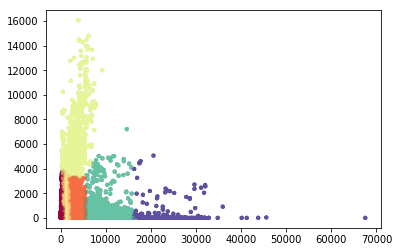

In [19]:
plt.scatter(data3[:, 1], data3[:, 0], c=predicted_clusters, s=10, cmap='Spectral', alpha=0.05)

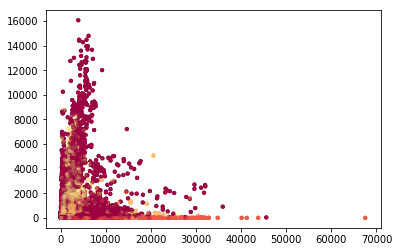

In [12]:
plt.scatter(X[:, 3], X[:, 2], c=y, s=10, cmap="Spectral", alpha=.05)
plt.show()

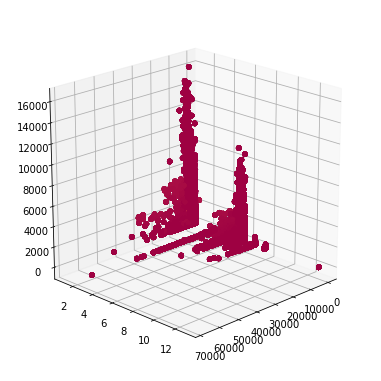

In [7]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(5, 5))
axes = Axes3D(fig, elev=20, azim=45)
axes.scatter(final['total_spend'], final['channel_id'], final['verified_visit_conversions'], c=final['verified_visit_total_order_value'], cmap="Spectral")
plt.show()